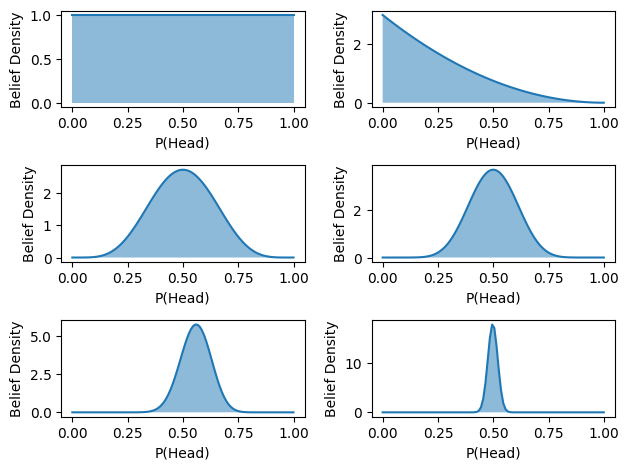

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Simulate coin tosses (0 = tail, 1 = head)
number_of_trials = [0, 2, 10, 20, 50, 500]
data = stats.bernoulli.rvs(0.5, size=number_of_trials[-1])

# Create probability space
x = np.linspace(0, 1, 100)

# Update beliefs with each new set of data
for i, N in enumerate(number_of_trials):
    heads = data[:N].sum()
    
    # Beta-Binomial model for updating beliefs
    # Beta distribution represents our belief about coin fairness
    posterior = stats.beta.pdf(x, 1 + heads, 1 + N - heads)
    
    plt.subplot(3, 2, i + 1)
    plt.plot(x, posterior, label=f"After {N} tosses, {heads} heads")
    plt.fill_between(x, 0, posterior, alpha=0.5)
    plt.xlabel("P(Head)")
    plt.ylabel("Belief Density")
    
plt.tight_layout()
plt.show()


In [3]:
import numpy as np
from scipy.stats import beta

# Observed data (5 heads out of 10 tosses)
heads, total_tosses = 5, 10

# Prior belief (Beta distribution parameters)
alpha_prior, beta_prior = 2, 2

# Update posterior parameters
alpha_posterior = alpha_prior + heads
beta_posterior = beta_prior + (total_tosses - heads)

# Generate posterior distribution
posterior_distribution = beta(alpha_posterior, beta_posterior)

# Get updated probability estimate
mean_probability = posterior_distribution.mean()
print(f"Updated probability of heads: {mean_probability:.3f}")


Updated probability of heads: 0.500


In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Built with CUDA:", tf.test.is_built_with_cuda())
print("GPU Available:", tf.config.list_physical_devices('GPU'))

# Check what CUDA version TensorFlow was built with
print("TF built with CUDA:", tf.sysconfig.get_build_info().get("cuda_version", "Unknown"))